In [2]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# Kaggle Competition

## 1. Exploration

### Preliminaries

In [2]:
from __future__ import unicode_literals, division

import IPython
import warnings
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import *
from IPython.display import HTML
from IPython.display import display as prnt

# Matplotlib in notebook
%matplotlib inline

# Notebook Options
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Matplotlib Styles
c = {'axes.labelsize': 17,
'axes.titlesize': 16,
'figure.figsize': [18, 8],
'grid.linewidth': 1.6,
'legend.fontsize': 17,
'lines.linewidth': 2,
'lines.markeredgewidth': 0.0,
'lines.markersize': 11,
'patch.linewidth': 0.5,
'xtick.labelsize': 16,
'xtick.major.pad': 20,
'xtick.major.width': 2,
'xtick.minor.width': 1,
'ytick.labelsize': 16.0,
'ytick.major.pad': 20,
'ytick.major.width': 2,
'ytick.minor.width': 1 }
wide_c = dict(c, **{'figure.figsize':[20,8]})

#### Utility Functions

In [3]:
def table(df,replace_match="",replace_str=""):
    return IPython.display.display(HTML(df.to_html().replace('<table border="1" class="dataframe">','<table class="table table-striped table-hover">').replace(replace_match,replace_str)))

### Load the Data

In [4]:
DATA_DIR = '../../data/bikeshare/'
TRAIN_FILE = DATA_DIR + 'train.csv'
TEST_FILE = DATA_DIR + 'test.csv'

In [5]:
df = pd.read_csv(TRAIN_FILE)

### Inspect the Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


#### Fix the Datatypes

In [7]:
df.datetime = pd.to_datetime(df.datetime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.1 MB


In [9]:
df = df.set_index('datetime')

#### Head & Tail

In [10]:
table(df.head(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [11]:
table(df.tail(5))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### Random sample of rows

In [12]:
from random import sample
table(df.ix[sample(df.index,10)])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-02-05 08:00:00,1,0,0,3,8.20,11.365,100,6.0032,0,10,10
2012-06-14 01:00:00,2,0,1,1,24.60,31.060,56,15.0013,4,17,21
2011-08-18 04:00:00,3,0,1,1,26.24,30.305,73,15.0013,0,9,9
2011-07-14 20:00:00,3,0,1,1,28.70,31.820,42,15.0013,81,267,348
2011-11-06 05:00:00,4,0,0,1,9.84,12.120,87,8.9981,0,5,5
2012-01-05 00:00:00,1,0,1,2,9.02,11.365,47,12.9980,1,13,14
2011-02-11 15:00:00,1,0,1,1,13.12,15.910,21,11.0014,12,62,74
2012-02-14 13:00:00,1,0,1,2,14.76,16.665,40,16.9979,6,167,173
2012-07-12 07:00:00,3,0,1,1,26.24,30.305,73,8.9981,32,480,512


## 1.1 Univariate

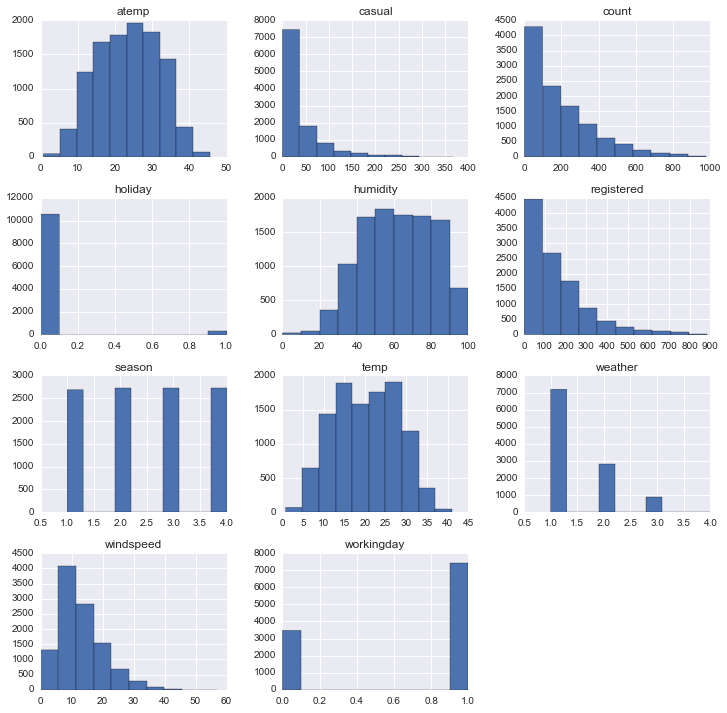

In [15]:
df.hist(figsize=(12,12));

#### Checking for normality

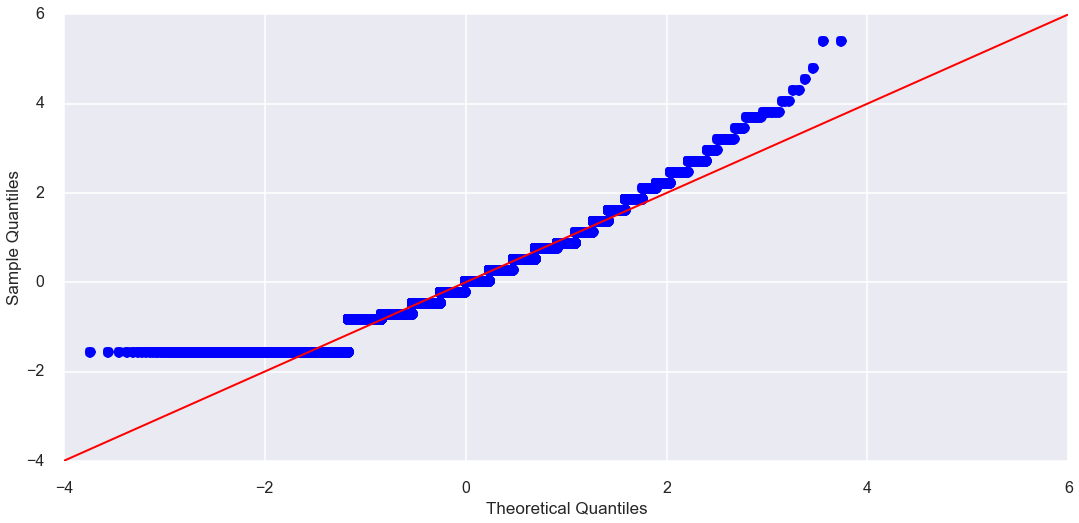

In [45]:
from statsmodels.graphics.gofplots import qqplot

with sns.plotting_context("poster", font_scale=1, rc=c):
    qqplot(df['windspeed'], line='45', fit=True);

## 1.2 Bivariate

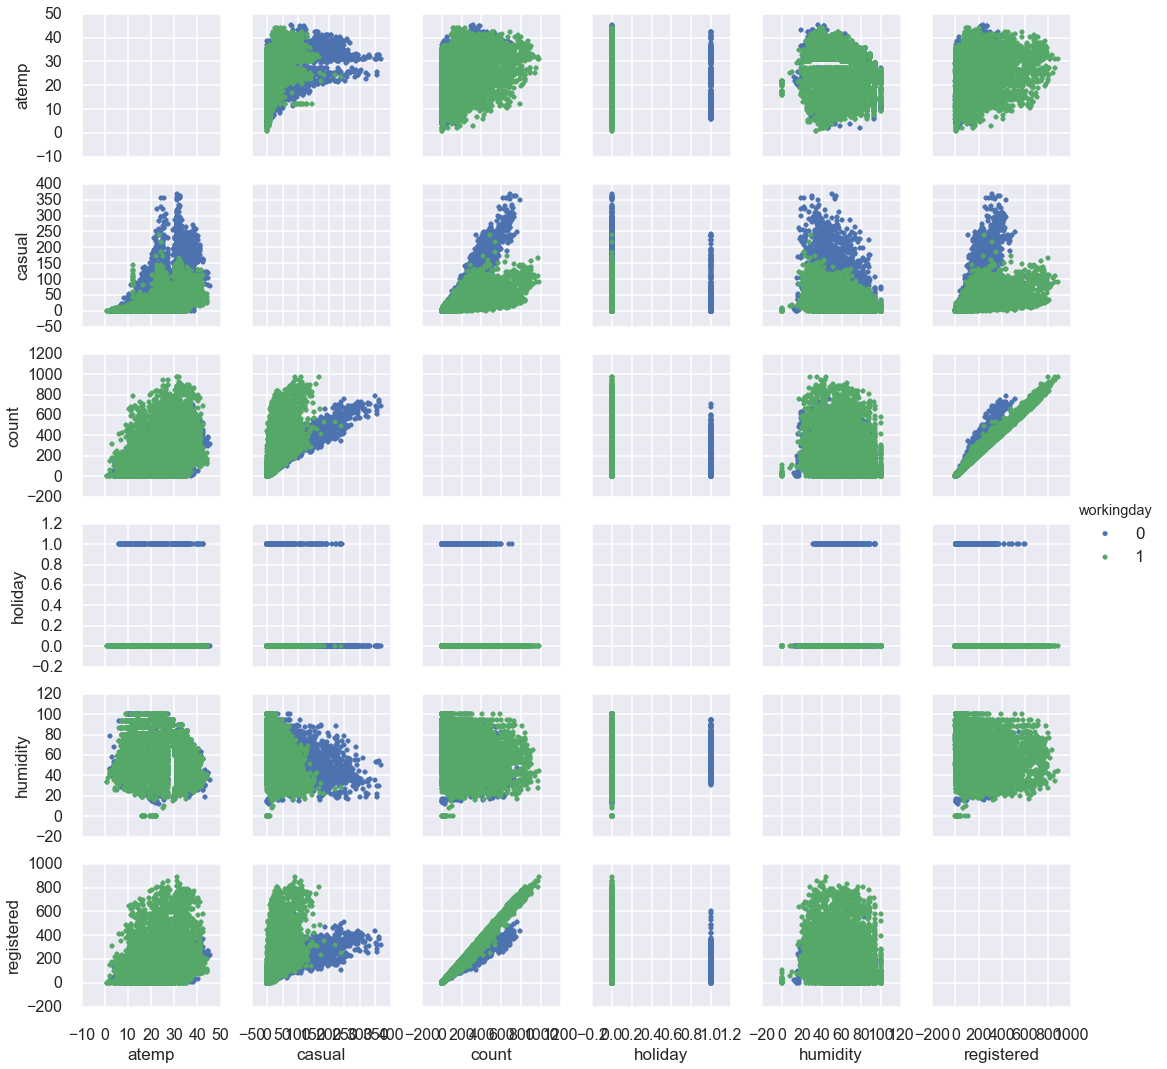

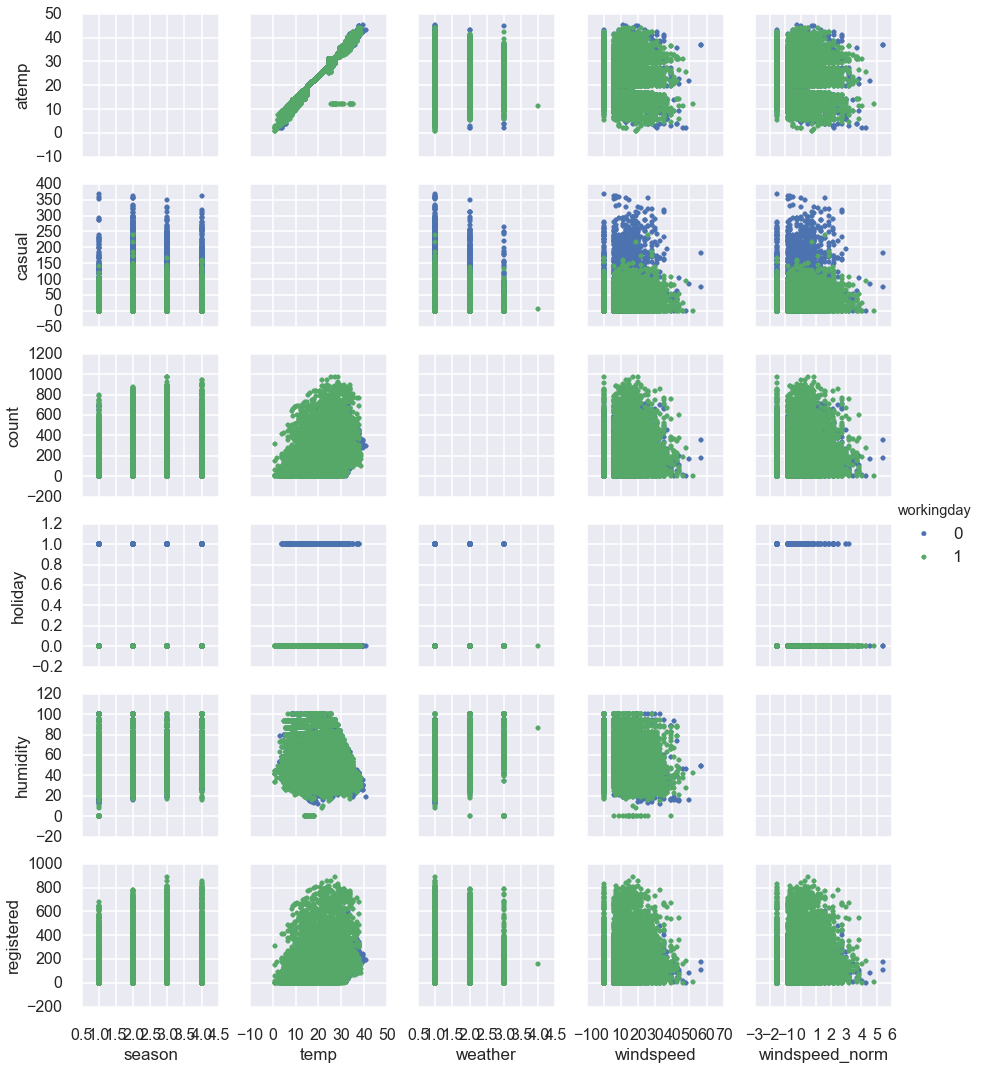

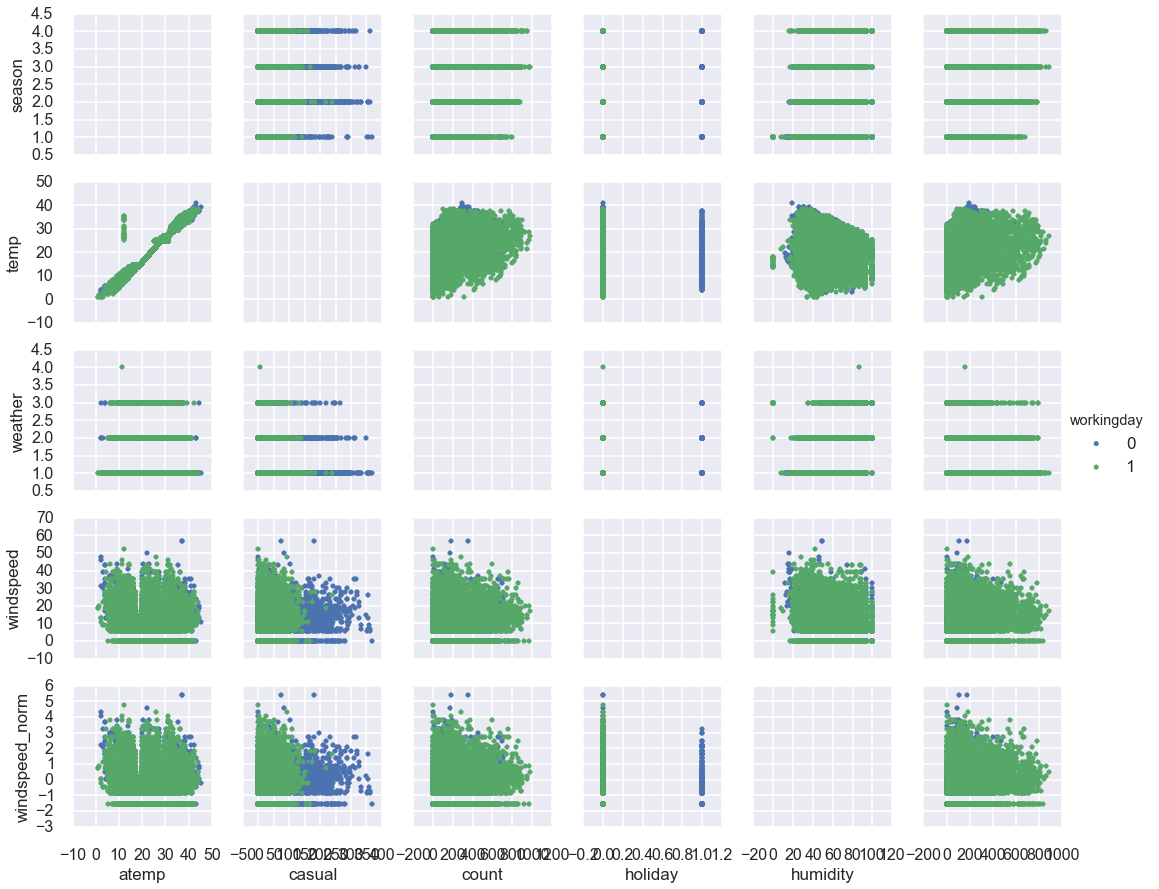

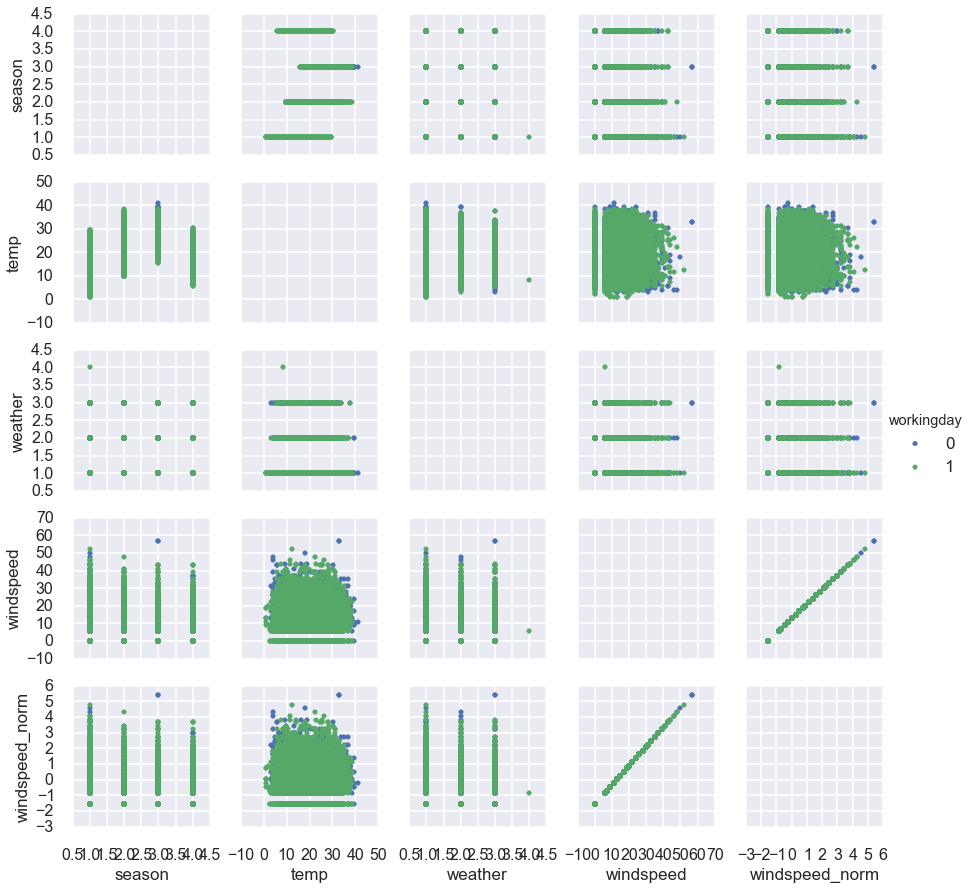

In [103]:
import math
import matplotlib.pyplot as plt

b, g, r, p = sns.color_palette("muted", 4)

hue = 'workingday'
grid_size = 6
cols = df.columns.difference([hue])
grid_split = math.ceil(len(cols) / grid_size)
grid_splits = int(grid_split**2)

for i in range(1, grid_splits + 1):
    x_step = (i + (grid_split - 1 )) % grid_split
    y_step = int(math.ceil(i / grid_split) - 1)
    
    x_vars = cols[x_step*grid_size:(x_step+1)*grid_size]
    y_vars = cols[y_step*grid_size:(y_step+1)*grid_size]

    with sns.plotting_context("poster", font_scale=1, rc=c):
        g = sns.PairGrid(df, hue=hue,x_vars=x_vars, y_vars=y_vars)
        g.map_offdiag(plt.scatter)
        g.add_legend()

#### Working Day vs. Count

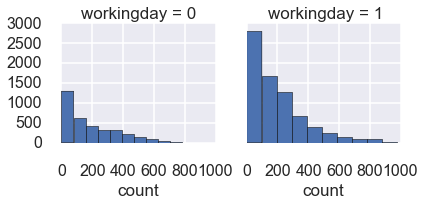

In [104]:
with sns.plotting_context("poster", font_scale=1, rc=c):
    g = sns.FacetGrid(df, col="workingday")
    g.map(plt.hist, "count");

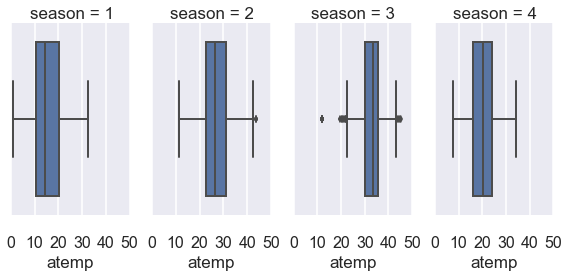

In [105]:
with sns.plotting_context("poster", font_scale=1, rc=c):
    g = sns.FacetGrid(df, col="season", size=4, aspect=.5)
    g.map(sns.boxplot, "atemp");

### 1.3 Multivariate

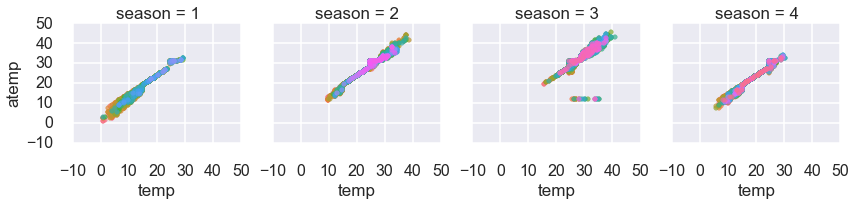

In [106]:
with sns.plotting_context("poster", font_scale=1, rc=c):
    g = sns.FacetGrid(df, col="season", hue="count")
    g.map(plt.scatter, "temp", "atemp", alpha=.7)